# CLUSTERING ANALYSIS FOR EASTWEST AIRLINES

## Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

## Introduction

The objective of this assignment is to introduce various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.

## Importing Necessary Libraries

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [208]:
df = pd.read_excel(r"E:\Data Science Course\Completed Data Science Assignments\Clustering\Clustering\EastWestAirlines.xlsx",sheet_name='data')

df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


## Data Description:

*The file EastWestAirlines contains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers*

- ID : Unique ID

- Balance : Number of miles eligible for award travel

- Qual_mile--Number of miles counted as qualifying for Topflight status

- cc1_miles : Number of miles earned with freq. flyer credit card in the past 12 months:
- cc2_miles : Number of miles earned with Rewards credit card in the past 12 months:
- cc3_miles : Number of miles earned with Small Business credit card in the past 12 months:

    * 1 = under 5,000
    * 2 = 5,000 - 10,000
    * 3 = 10,001 - 25,000
    * 4 = 25,001 - 50,000
    * 5 = over 50,000

- Bonus_miles : Number of miles earned from non-flight bonus transactions in the past 12 months

- Bonus_trans : Number of non-flight bonus transactions in the past 12 months

- Flight_miles_12mo : Number of flight miles in the past 12 months

- Flight_trans_12 : Number of flight transactions in the past 12 months

- Days_since_enrolled : Number of days since enrolled in flier program

- Award : whether that person had award flight (free flight) or not

## Performing EDA of the Dataset

### Preprocessing Data

#### Removing not required column

In [210]:
# Removing id column
df.drop(columns = ['ID#'], inplace = True)

df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

#### Descriptive Analysis of the Dataset

In [211]:
df.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll       Award?  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

#### Checking for Missing Values

In [212]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

#### Checking for Duplicated Values

In [213]:
df[df.duplicated()]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
3876     1000           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
3876            0                  0                0               1597   

      Award?  
3876       0

- There is 1 duplicate value in the dataset

In [214]:
df.drop_duplicates(inplace= True)

- Check after removing duplicates

In [215]:
df[df.duplicated()]

Empty DataFrame
Columns: [Balance, Qual_miles, cc1_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12, Days_since_enroll, Award?]
Index: []

- There is no duplicate value in the dataset now

### Visualizing the Data

#### Ploting Boxplot

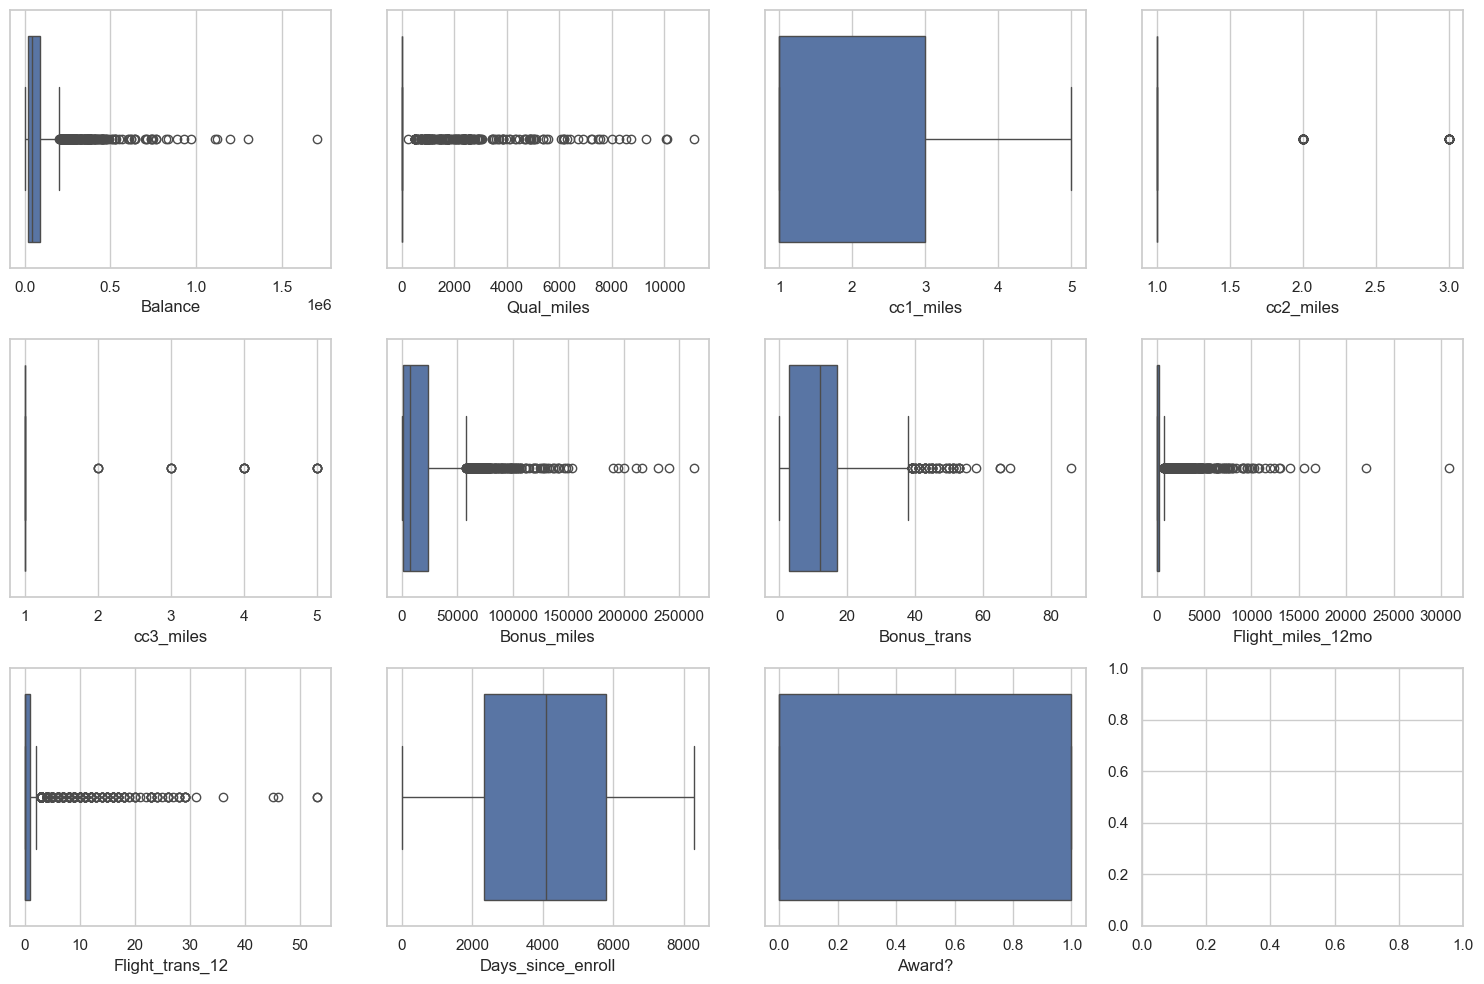

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3, 4, figsize=(15, 10))  # adjust the figure size as needed

j = 0
k = 0
for i in df.columns:
    sns.boxplot(df[i], ax=ax[k, j], orient='h')
    j += 1
    if j == 4:
        j = 0
        k += 1

plt.tight_layout()
plt.show()

 **Insights:**

* The distribution of the data is highly skewed to the right for most of the features (`Balance`, `Qual_miles`, `Bonus_miles`, `Bonus_trans`, `Flight_miles_12mo`, and `Flight_trans_12`) indicating potential presence of outliers, which may affect performance of certain machine learning models.
* Features `cc1_miles`, `cc2_miles`, and `cc3_miles` show much narrower distributions, suggesting normality.
* Feature `Award?` shows least variability and is binary - suitable as response variable for classification ML problems.
* Feature `Days_since_enroll` follows a uniform distribution, offering less information compared to others.

In summary, the dataset appears non-normally distributed with numerous outliers, potentially affecting suitability for certain ML algorithms. Consider addressing these concerns via methods like outlier removal, data transformations, or utilizing models resilient to outliers prior to model development.

#### Plotting Histplot

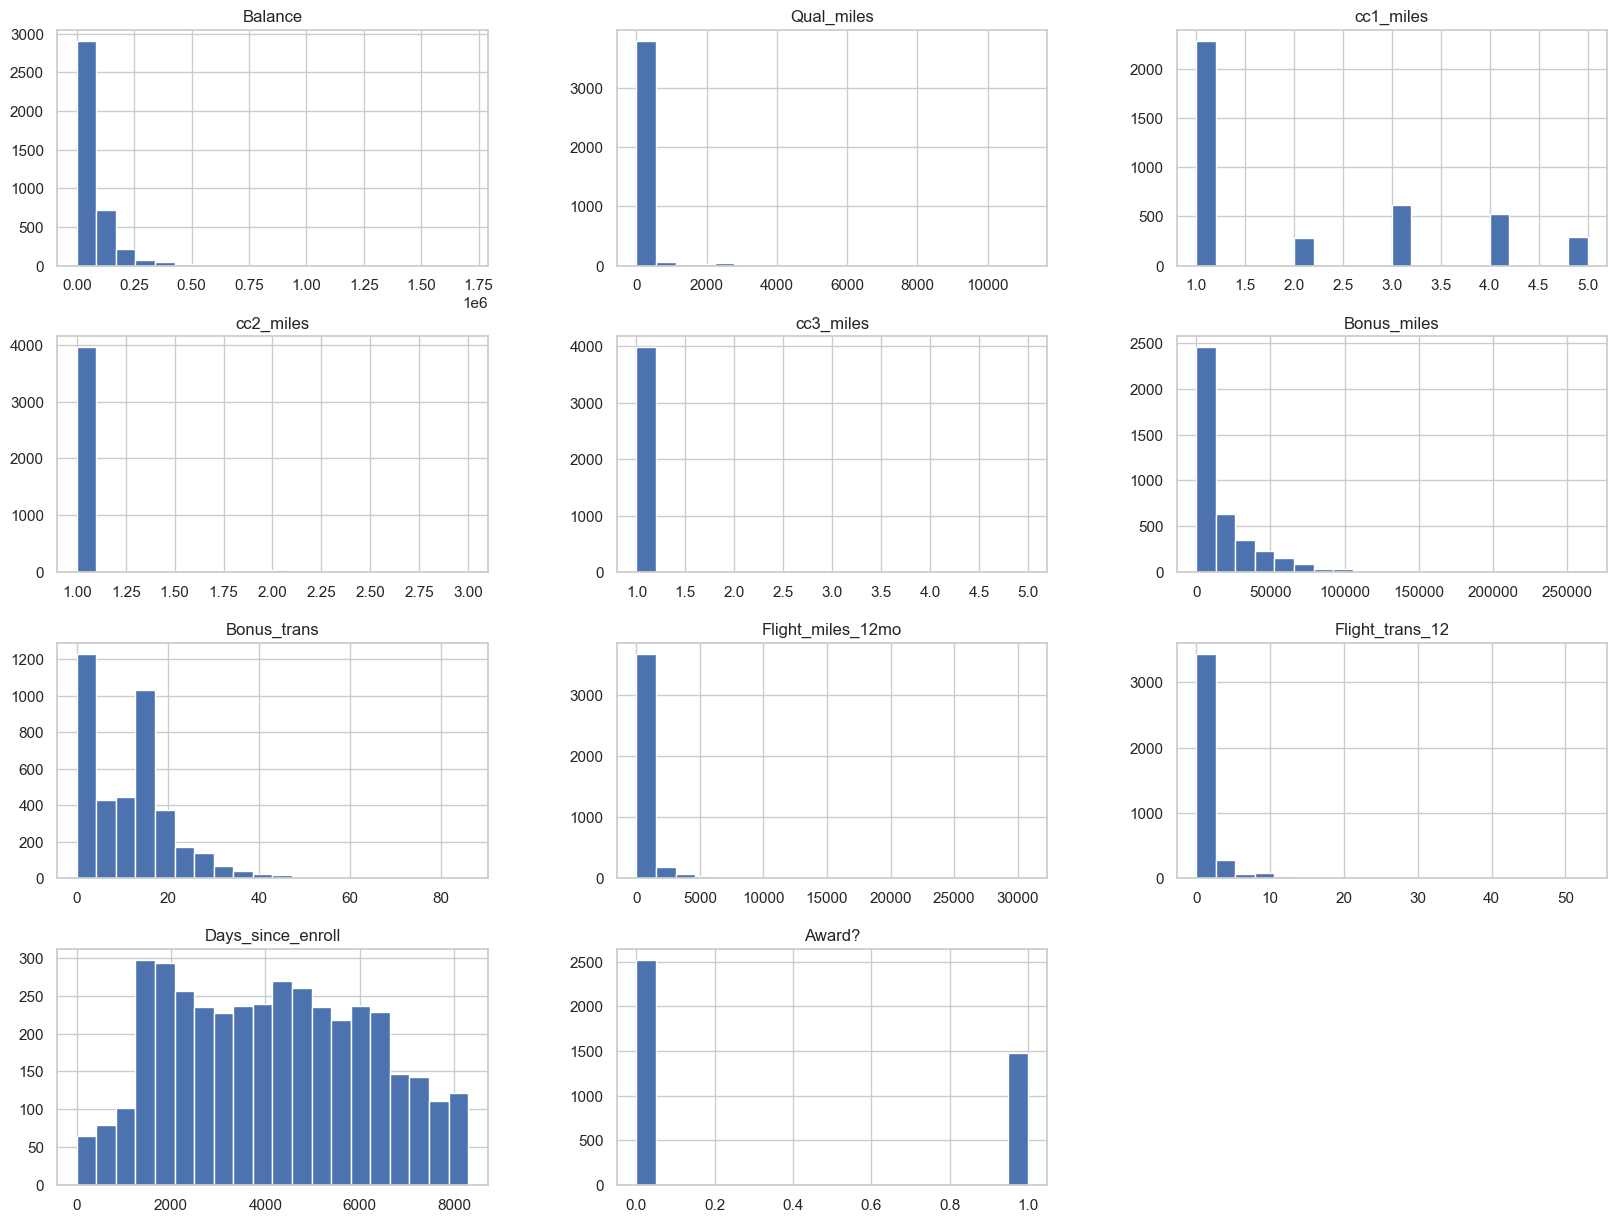

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style='whitegrid')

# Plot the distribution of each feature
df.hist(bins=20, figsize=(20, 15))
plt.show()

 Histograms display various features' distribution within the dataset, providing following observations:

* Customers generally possess lower `Balance` values; most lie under 500,000 miles.
* Majority of clients accumulate minimal `Qual_miles`; many have less than 2,000 qualifying miles due to its strong left skew.
* Both `cc2_miles` & `cc3_miles` share comparable trends with `Balance`, showing predominant concentrations under 2M miles.
* For `Bonus_miles` and `Bonus_trans`, most consumers obtain smaller bonuses, usually falling short of 50K miles and 20 transac., respectively.
* Low flight mileage & activity levels pervade `Flight_miles_12mo` and `Flight_trans_12`, where majority report < 5k miles & < 10 transac. in past yr.
* A unimodal shape characterizes `Days_since_enroll`. Many fall into the 2,000-6,000 day span after registration.
* Bimodality distinguishes `Award?` curve, revealing two primary customer clusters—those receiving awards vs. those without.

#### Plotting PairPlot

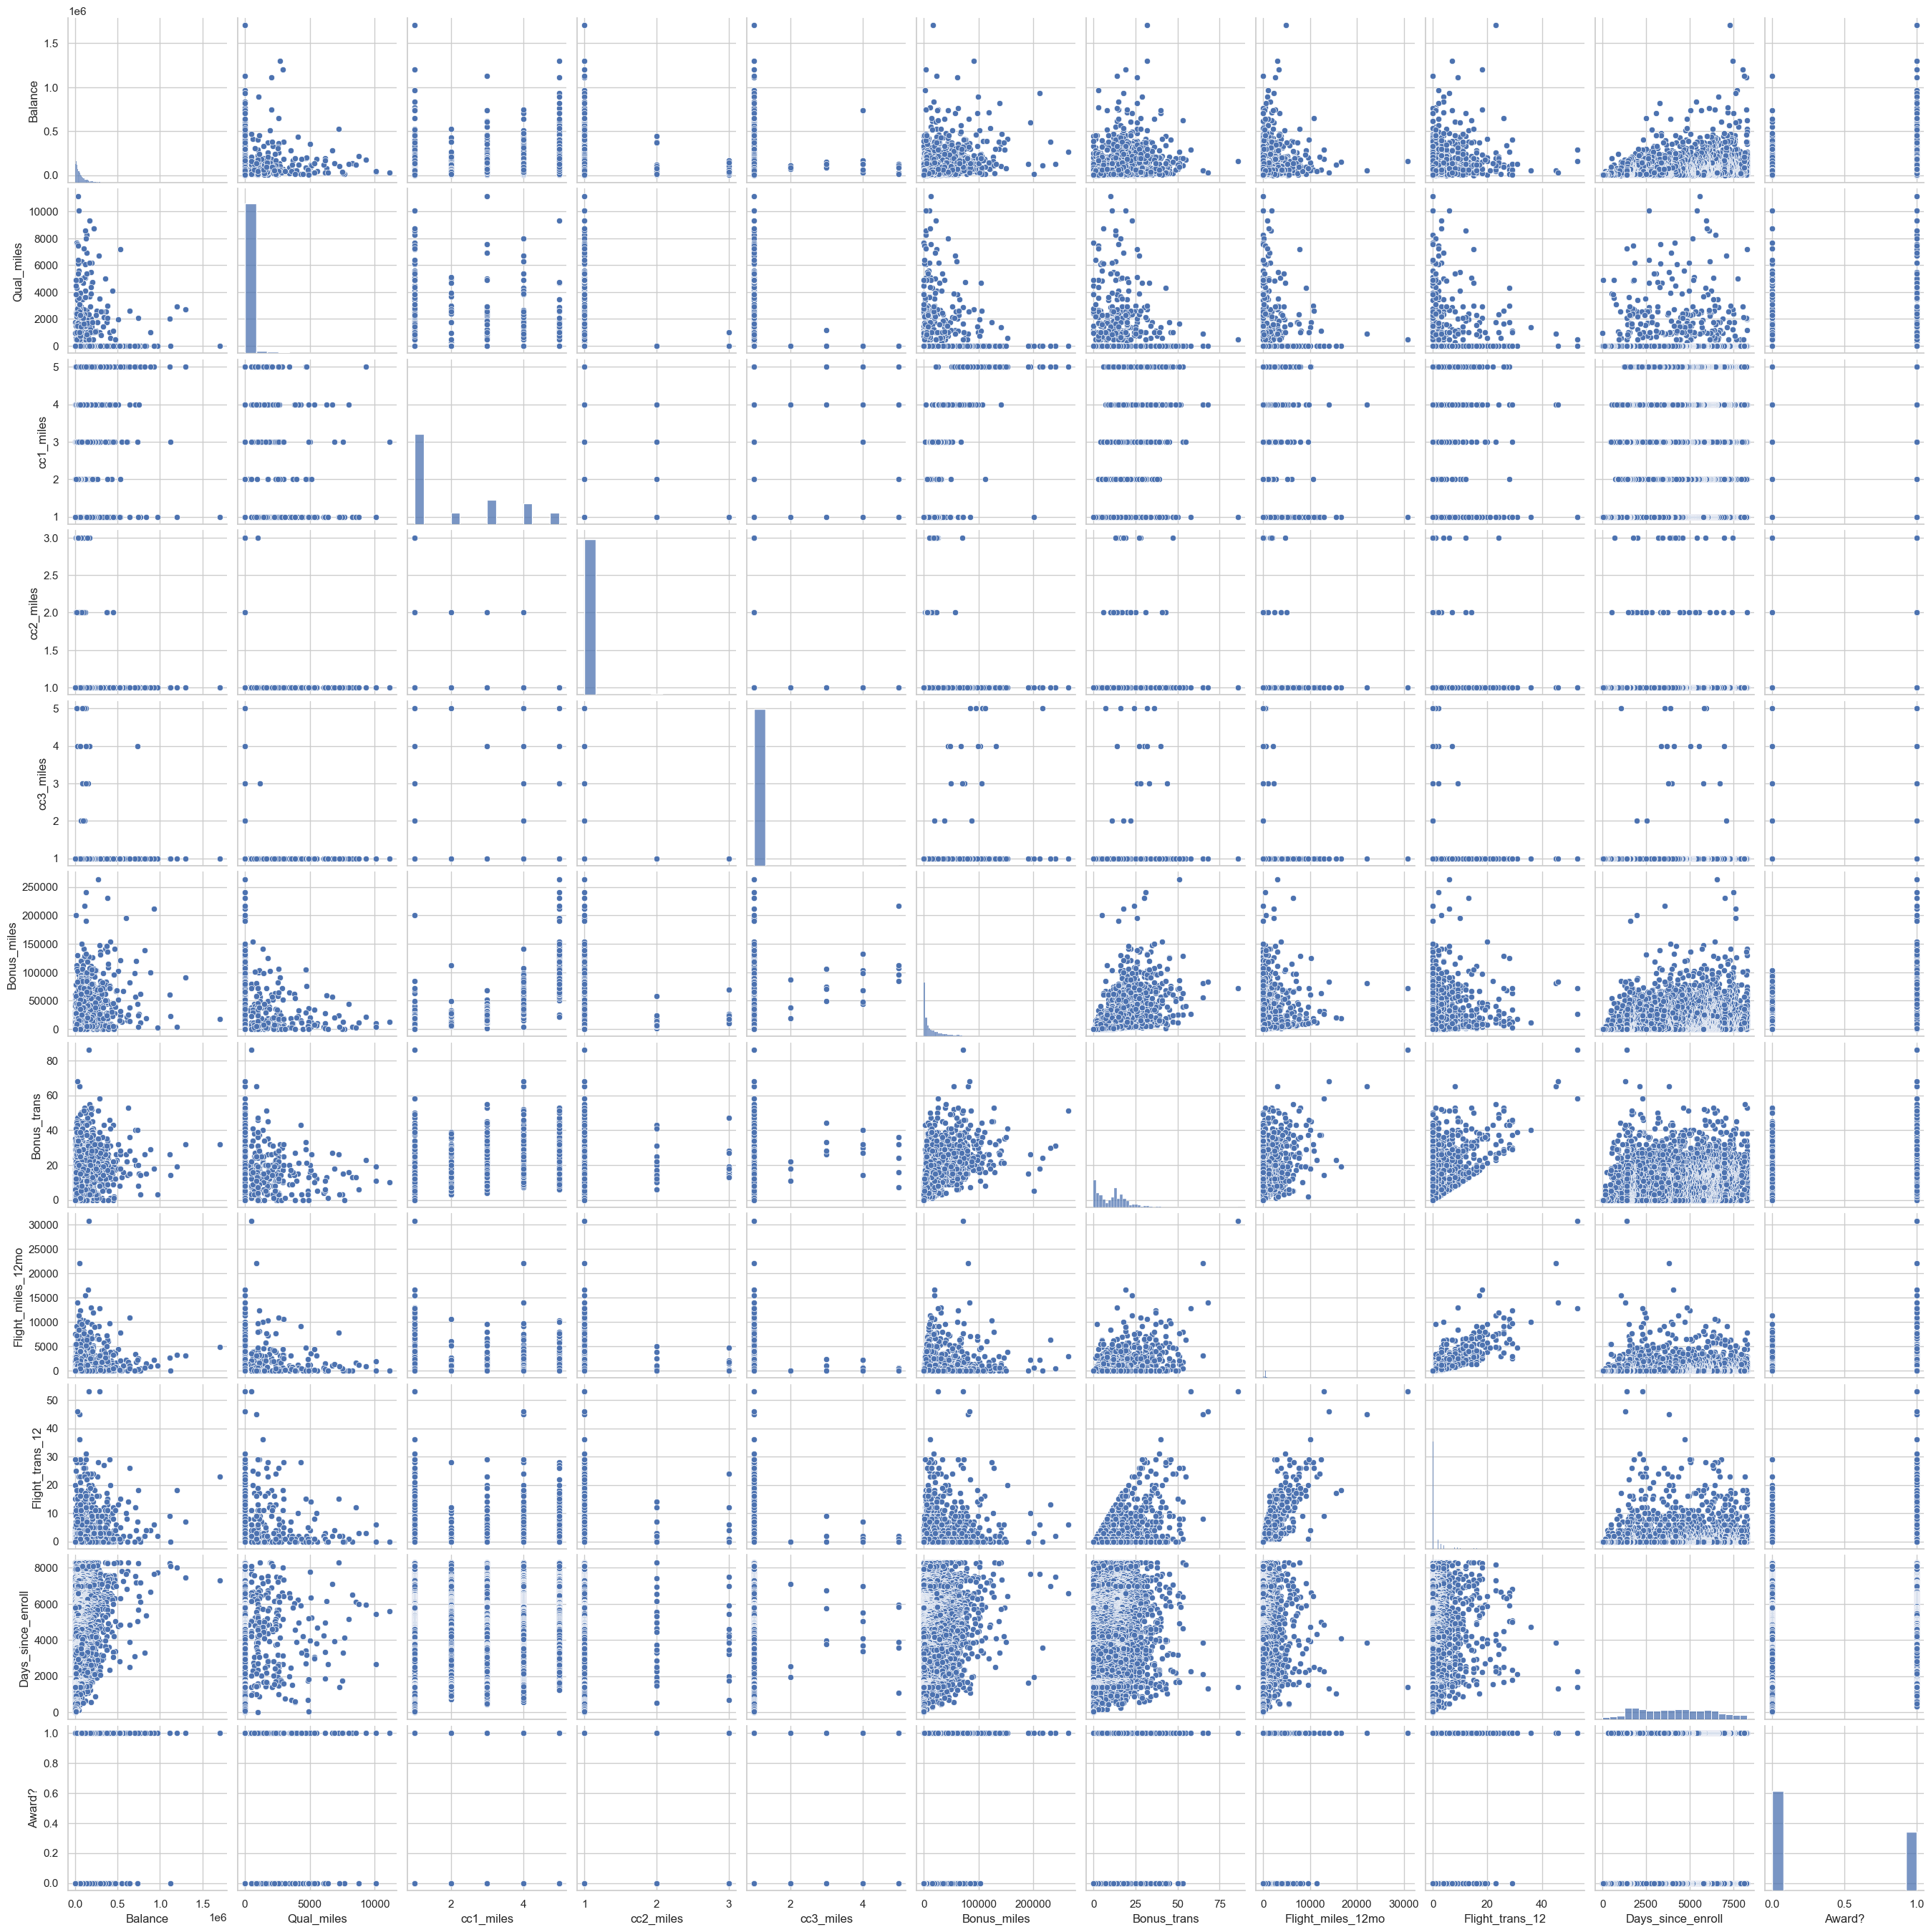

In [218]:
# Pair plot to visualize relationships between features
sns.pairplot(df)
plt.show()

### Insights from Pair Plots

- There are a few clear linear relationships (e.g., between `Flight_miles_12mo` and `Flight_trans_12`, or `Bonus_miles` and `Bonus_trans`).
- Many variables seem to exhibit no or weak correlations with others, indicating that more advanced techniques (such as interaction terms or clustering) may be required to capture the underlying patterns.
- The presence of many zero values suggests a large portion of customers might not be engaging with certain features or services, and understanding these customers could be key to improving engagement.

#### Correlation analysis

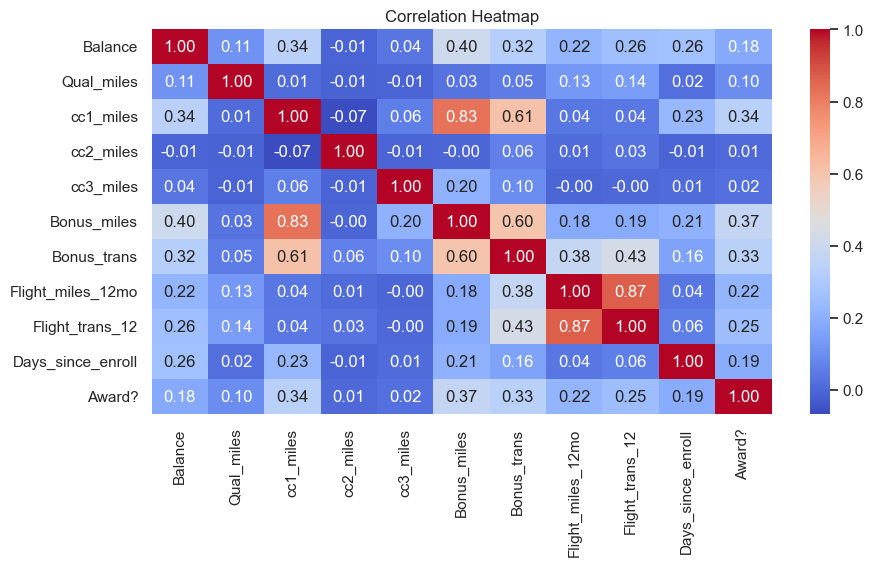

In [219]:
# Correlation heatmap to understand relationships between features
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

- **1** indicates a perfect positive correlation.
- **-1** indicates a perfect negative correlation.
- **0** indicates no correlation.

#### Key Observations:
1. **Strong Positive Correlations**:
   - `cc1_miles` and `Bonus_miles` (0.83): High credit card miles from one source are strongly correlated with bonus miles.
   - `Flight_trans_12` and `Flight_miles_12mo` (0.87): The number of transactions for flights is strongly correlated with the miles traveled in the past 12 months.

2. **Moderate Positive Correlations**:
   - `Bonus_trans` and `Bonus_miles` (0.60): More bonus transactions are correlated with higher bonus miles.
   - `Award?` and `cc1_miles` (0.34): Award status is moderately correlated with miles accumulated from a credit card.

3. **Low or No Correlation**:
   - Many variables, like `Balance` and `cc3_miles` (-0.01), show little or no correlation.

The color gradient helps visualize the strength of the correlations, with red indicating strong positive correlations and blue indicating weak or negative correlations. 

Would you like further analysis or help interpreting specific aspects of this heatmap?

### Outlier Detection

In [220]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                      (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100

        print(str(df.columns[i]) + ' : ' + str(percentage) + ' %')

In [221]:
def replace_outlier_median(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, st[col].median(), inplace=True)
    st[col].mask(st[col] < lower, st[col].median(), inplace=True)

In [222]:
def replace_outlier_extream(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, upper, inplace=True)
    st[col].mask(st[col] < lower, lower, inplace=True)

In [223]:
def remove_outlier(st, col):
    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st = st[(st[col] > lower) & (st[col] < upper)]

    return st

#### Outlier Percentage (Before)

In [224]:
outlier_percentage(df)

Balance : 6.653326663331666 %
Qual_miles : 5.652826413206603 %
cc1_miles : 0.0 %
cc2_miles : 1.0755377688844423 %
cc3_miles : 0.4502251125562781 %
Bonus_miles : 6.9784892446223115 %
Bonus_trans : 1.5757878939469734 %
Flight_miles_12mo : 14.232116058029016 %
Flight_trans_12 : 14.132066033016507 %
Days_since_enroll : 0.0 %
Award? : 0.0 %


#### Replacing Outlier In Flight_Miles_12mo Column

In [225]:
pe.box(df['Flight_miles_12mo'], orientation='h')

In [226]:
replace_outlier_extream(df, 'Flight_miles_12mo')

In [227]:
pe.box(df['Flight_miles_12mo'], orientation='h')

#### Replacing Outlier In Flight Trans 12 Column

In [228]:
pe.box(df['Flight_trans_12'], orientation='h')

In [229]:
replace_outlier_extream(df, 'Flight_trans_12')

In [230]:
pe.box(df['Flight_trans_12'], orientation='h')

#### Outlier Percentage (After)

In [231]:
outlier_percentage(df)

Balance : 6.653326663331666 %
Qual_miles : 5.652826413206603 %
cc1_miles : 0.0 %
cc2_miles : 1.0755377688844423 %
cc3_miles : 0.4502251125562781 %
Bonus_miles : 6.9784892446223115 %
Bonus_trans : 1.5757878939469734 %
Flight_miles_12mo : 0.0 %
Flight_trans_12 : 0.0 %
Days_since_enroll : 0.0 %
Award? : 0.0 %


- we tried removeing/replacing the outlier on Balance and Bonus Miles column but it just sifted the extreme, so we will be retaining the outlier.
- as there aren't several value in Qual_miles, so we will be retaining the outlier.

### Performing Feature Scaling

In [232]:
x = df.drop(columns=['cc1_miles','cc2_miles','cc3_miles','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?'])

In [233]:
# Scale the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Display the cleaned and scaled dataset
df_scaled.head()

Balance  Qual_miles  Bonus_miles  Bonus_trans
0 -0.451294   -0.186323    -0.702920    -1.104430
1 -0.539605   -0.186323    -0.701223    -1.000286
2 -0.320192   -0.186323    -0.539397    -0.791997
3 -0.583944   -0.186323    -0.689421    -1.104430
4  0.239483   -0.186323     1.082876     1.499179

## Implementing Clustering Algorithms

### K-Means Clustering

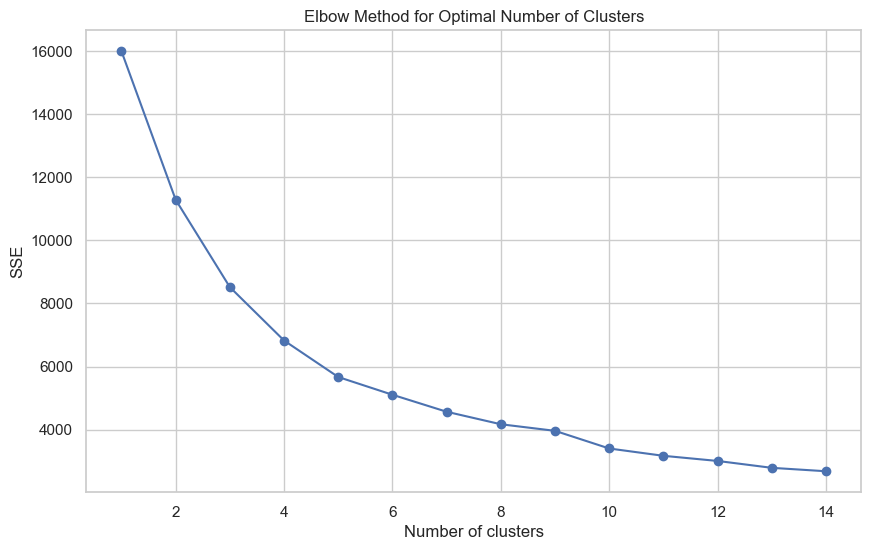

In [234]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
sse = []       # Sum of Squared Errors    
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

- From the graph, the elbow seems to be around 4 clusters, where the rate of decrease in SSE becomes less pronounced. This suggests that 4 clusters may be an optimal choice for our K-means model.

#### Preparing K-MEANS Clustering Model

In [311]:
# Apply K-Means clustering to the dataset
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_km = kmeans.fit_predict(df_scaled)
df['Km_cluster'] = y_km
df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1               0.00              0.0               7000       0   
1            2               0.00              0.0               6968       0   
2            4               0.00              0.0               7034       0   
3            1               0.00              0.0               6952       0   
4           26             783.75              2.5               6935       1   

   Km_cluster         HC_cluster   DBSCAN_Cluster  
0           0  Ocassional Flyers  General Members  
1           0  Ocassional Flyers  General Members  
2           0  Ocassional Flyers  General Members  
3           0  Ocassional Flyers  General Members  
4           1  Ocassional Flyers  General Members

#### Drawing Inferance From Dataset

In [243]:
df.groupby('Km_cluster').agg('mean')

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Km_cluster                                                                
0            37853.021984    47.533742   1.071575   1.004601   1.000000   
1            76797.144068    51.456416   2.802058   1.025424   1.006659   
2           263423.649231   180.233846   4.243077   1.021538   1.116923   
3           120132.769231  5227.015385   2.015385   1.000000   1.000000   

             Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Km_cluster                                                                  
0            2897.701943     4.187117         125.845859         0.430982   
1           23579.897094    17.433414         186.762712         0.609867   
2           69948.867692    26.298462         409.383846         1.309231   
3           18568.661538    13.215385         428.684615         1.376923   

            Days_since_enroll    Award?  
Km_cluster                               
0                 3730.341513  0.216258  
1                 4354.397094  0.480024  
2                 5275.480000  0.701538  
3                 4061.215385  0.569231

#### Interpreting the clusters:

- **Cluster 0**: 
  - Lower `Balance` and `Qual_miles`.
  - Low participation in credit card miles (`cc1_miles`, `cc2_miles`, `cc3_miles` close to 1).
  - Relatively low `Bonus_miles`, `Bonus_trans`, and `Flight_miles_12mo`.
  - Very low proportion of awards (`Award?` = 0.216).

- **Cluster 1**:
  - Moderate `Balance` and `Qual_miles`.
  - Slightly higher involvement in credit card miles programs (`cc1_miles` ~2.8).
  - Significantly higher `Bonus_miles` and `Bonus_trans`.
  - Moderate award participation (`Award?` = 0.480).

- **Cluster 2**:
  - High `Balance` and `Qual_miles`, and highest credit card miles usage (`cc1_miles` ~4.24).
  - Significantly higher `Bonus_miles`, `Bonus_trans`, and `Flight_miles_12mo`.
  - Highest award proportion (`Award?` = 0.701).

- **Cluster 3**:
  - Very high `Qual_miles`, though the `Balance` is moderate.
  - Lower credit card miles usage (`cc1_miles` ~2.01).
  - Moderate `Bonus_miles` and `Flight_miles_12mo`.
  - Relatively higher awards participation (`Award?` = 0.569).

#### Labeling the Clusters

In [244]:
df['Km_cluster'].replace(to_replace = 0, value = 'Infrequent Flyers', inplace = True)
df['Km_cluster'].replace(to_replace = 1, value = 'Moderate Flyers', inplace = True)
df['Km_cluster'].replace(to_replace = 2, value = 'Frequent Flyers', inplace = True)
df['Km_cluster'].replace(to_replace = 3, value = 'Premium Flyers', inplace = True)

In [245]:
# Display the cluster centers
kmeans.cluster_centers_

array([[-0.35437441, -0.12503939, -0.58930136, -0.77059479],
       [ 0.03255791, -0.11965102,  0.26874603,  0.6087696 ],
       [ 1.88663553,  0.04735869,  2.18798069,  1.53389332],
       [ 0.46158269,  6.56989101,  0.05878094,  0.16773304]])

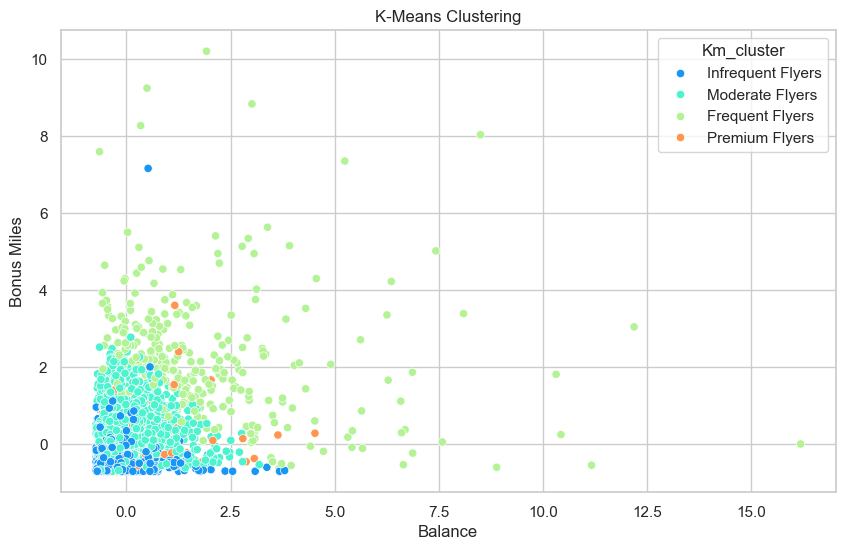

In [246]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled['Balance'], y=df_scaled['Bonus_miles'], hue=df['Km_cluster'], palette='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.show()

#### Insights from K-means scatter plot

1. **Cluster 0: Infrequent Flyers**  
   This cluster includes individuals with low balances, minimal miles, and low award participation, indicating infrequent flying habits.

2. **Cluster 1: Moderate Flyers**  
   Members of this cluster have a moderate balance and engagement with miles and bonuses, representing occasional flyers who participate in some programs.

3. **Cluster 2: Frequent Flyers**  
   This cluster is characterized by high balances, significant miles accumulation, and strong award participation, indicating very active frequent flyers.

4. **Cluster 3: Premium Flyers**  
   With a high level of `Qual_miles` and reasonable engagement in bonus programs, this cluster likely represents individuals who frequently travel and enjoy benefits.


### Experimenting with Different K Values

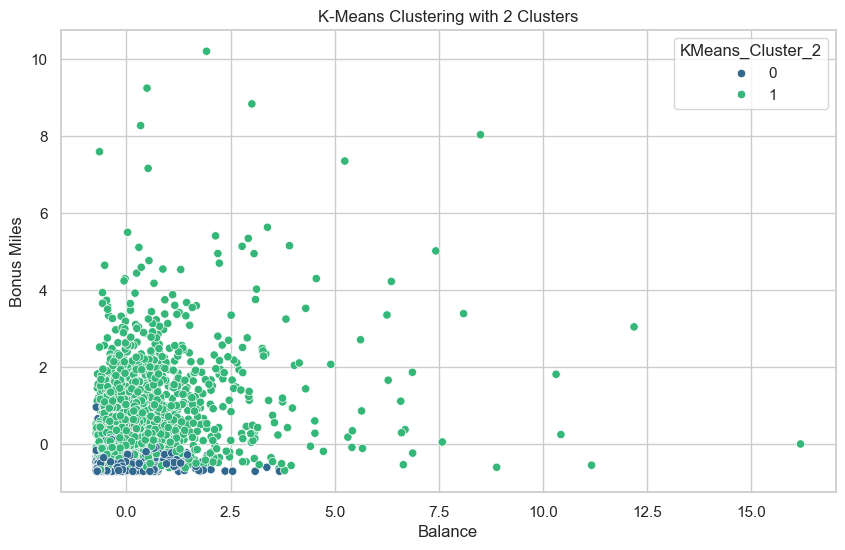

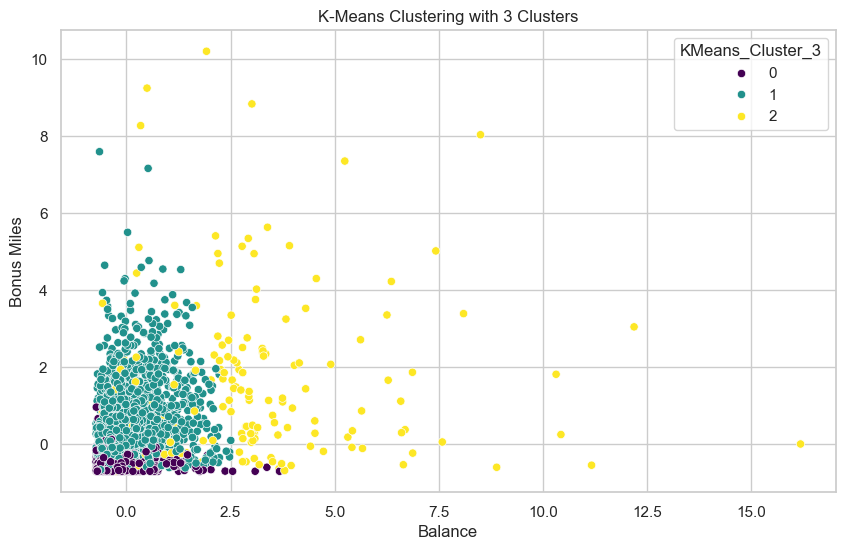

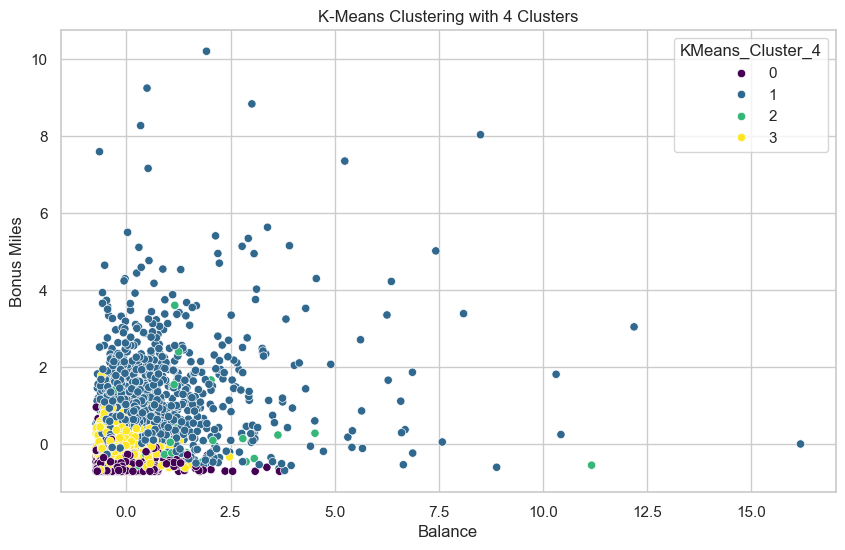

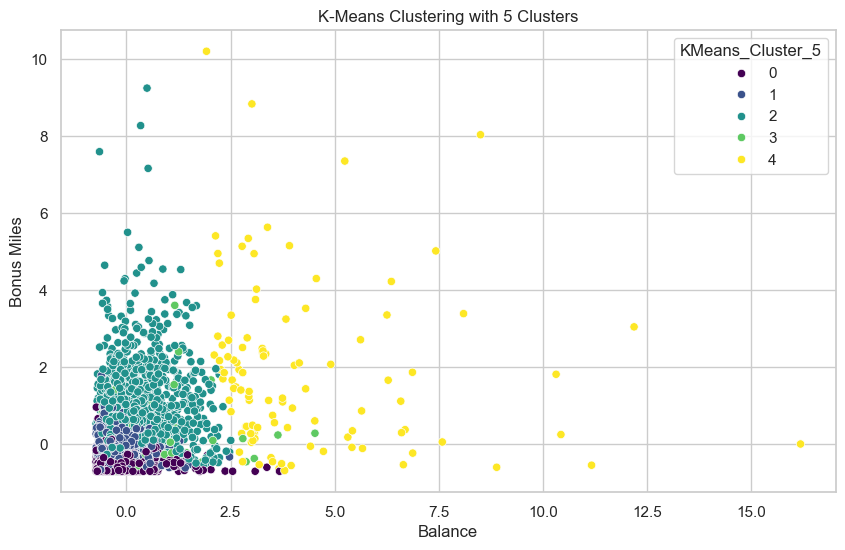

In [250]:
# Experiment with different K values
k_values = [2, 3, 4, 5]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    df_scaled[f'KMeans_Cluster_{k}'] = kmeans.fit_predict(df_scaled)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_scaled['Balance'], y=df_scaled['Bonus_miles'], hue=df_scaled[f'KMeans_Cluster_{k}'], palette='viridis')
    plt.title(f'K-Means Clustering with {k} Clusters')
    plt.xlabel('Balance')
    plt.ylabel('Bonus Miles')
    plt.show()

### Hierarchical Clustering

#### Experimenting with Different Linkage Criteria

In [251]:
df_scaled.head()

Balance  Qual_miles  Bonus_miles  Bonus_trans  KMeans_Cluster_2  \
0 -0.451294   -0.186323    -0.702920    -1.104430                 0   
1 -0.539605   -0.186323    -0.701223    -1.000286                 0   
2 -0.320192   -0.186323    -0.539397    -0.791997                 0   
3 -0.583944   -0.186323    -0.689421    -1.104430                 0   
4  0.239483   -0.186323     1.082876     1.499179                 1   

   KMeans_Cluster_3  KMeans_Cluster_4  KMeans_Cluster_5  
0                 0                 0                 0  
1                 0                 0                 0  
2                 0                 0                 0  
3                 0                 0                 0  
4                 1                 1                 2

In [253]:
df_scaled.drop(columns=['KMeans_Cluster_2',	'KMeans_Cluster_3',	'KMeans_Cluster_4',	'KMeans_Cluster_5'], inplace=True)
df_scaled.head()

Balance  Qual_miles  Bonus_miles  Bonus_trans
0 -0.451294   -0.186323    -0.702920    -1.104430
1 -0.539605   -0.186323    -0.701223    -1.000286
2 -0.320192   -0.186323    -0.539397    -0.791997
3 -0.583944   -0.186323    -0.689421    -1.104430
4  0.239483   -0.186323     1.082876     1.499179

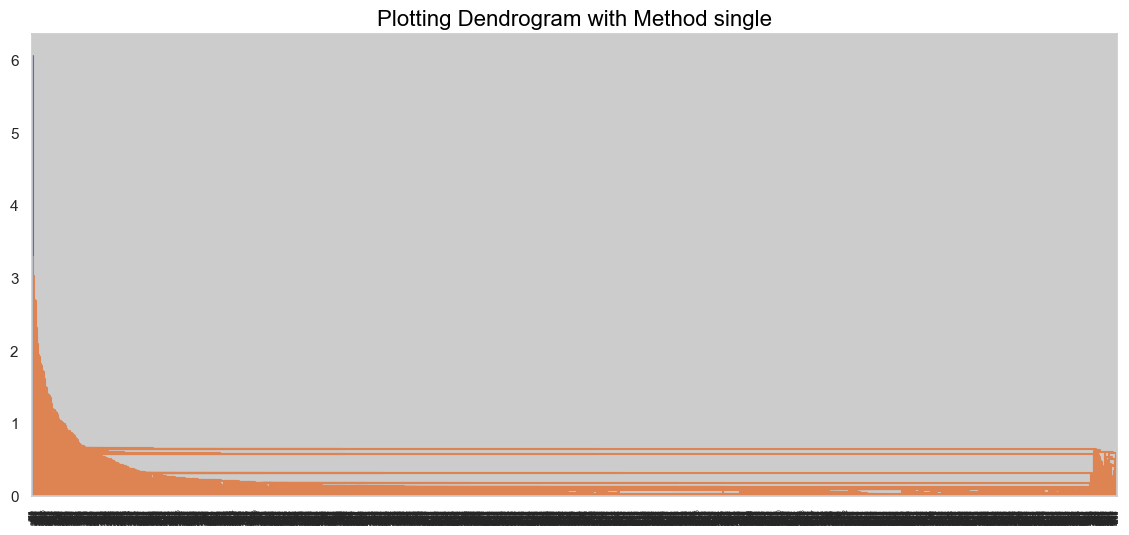

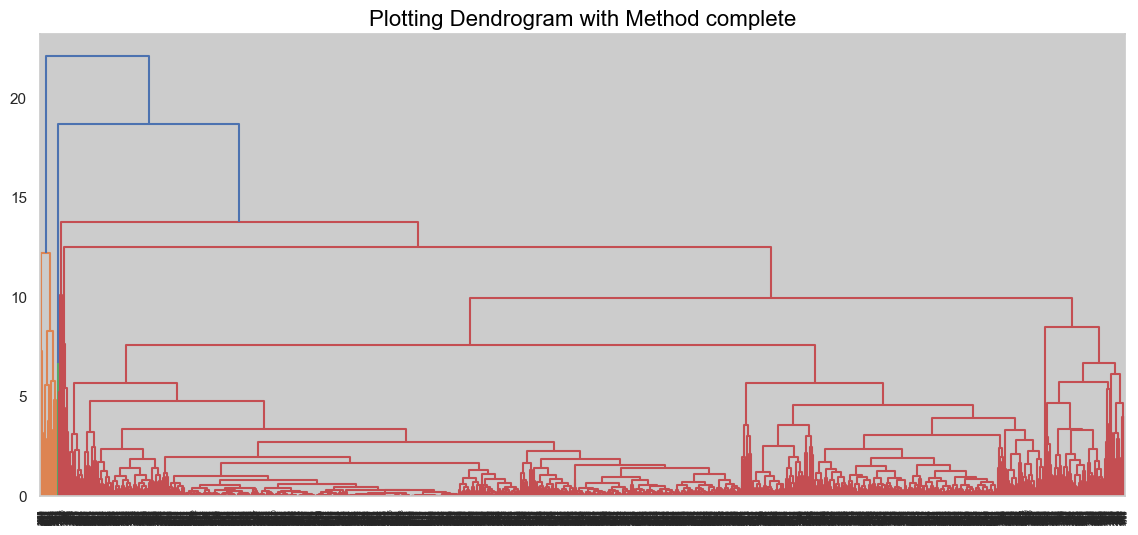

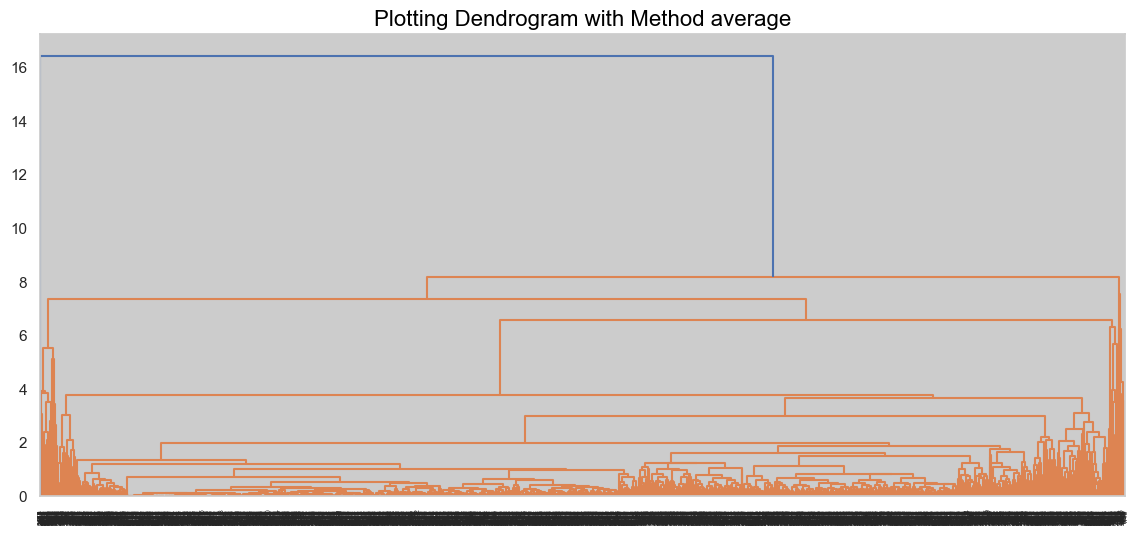

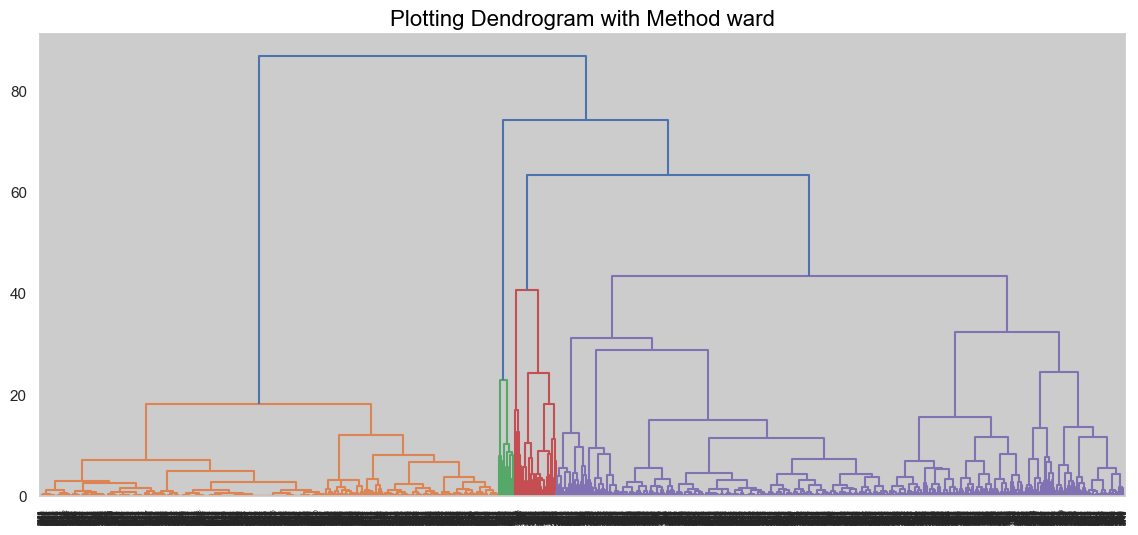

In [254]:
# Experiment with different linkage criteria
linkage_methods = ['single','complete','average','ward']
for methods in linkage_methods: 
    plt.figure(figsize =(14,6))    
    dict = {'fontsize':16,'fontweight' :14, 'color' : 'Black'}    
    plt.title(f'Plotting Dendrogram with Method {methods}',fontdict = dict) 
    Dendrogram1 = hierarchy.dendrogram(hierarchy.linkage(df_scaled, method = methods,optimal_ordering=False))
    plt.show()

- Best suited Linkage in this dataset is 'Ward' linkage

#### Picking up Best suited method for Hierarchical Clustering

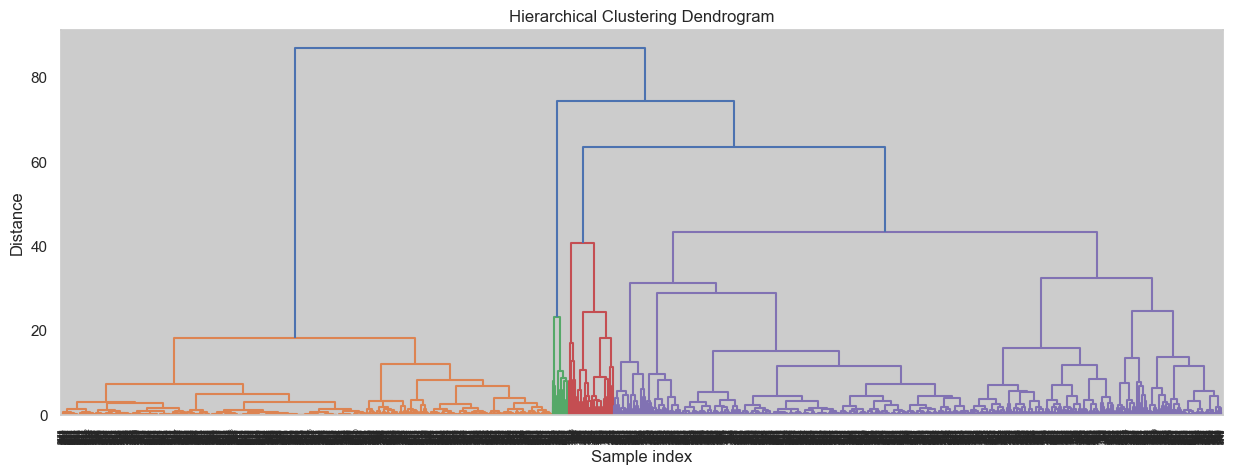

In [256]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Apply Hierarchical clustering to the dataset
Z = linkage(df_scaled, method='ward')

# Visualize the dendrogram
plt.figure(figsize=(15, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

- We get 4 clear clusters , if we cut the dendogram at level 50

#### Agglomerative Clustering and Finding Number of Clusters

In [267]:
from sklearn.cluster import AgglomerativeClustering

# Create the Agglomerative Clustering model
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')

# Fit the model to your data (assuming your data is in a variable called X)
y_hc = hc.fit_predict(df_scaled)

# Get the cluster labels
labels = hc.labels_

# Print cluster labels
print(labels)

[0 0 0 ... 0 0 0]


In [268]:
df['HC_cluster'] = y_hc
df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1               0.00              0.0               7000       0   
1            2               0.00              0.0               6968       0   
2            4               0.00              0.0               7034       0   
3            1               0.00              0.0               6952       0   
4           26             783.75              2.5               6935       1   

          Km_cluster  HC_cluster  
0  Infrequent Flyers           0  
1  Infrequent Flyers           0  
2  Infrequent Flyers           0  
3  Infrequent Flyers           0  
4    Moderate Flyers           0

#### Drawing Inferance From Dataset

In [269]:
df.select_dtypes(include='number').groupby('HC_cluster').agg('mean')

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
HC_cluster                                                               
0           7.018767e+04    58.299285   2.050051   1.014811   1.011491   
1           1.285186e+05  5141.666667   2.106061   1.000000   1.000000   
2           1.329876e+06  1910.000000   3.000000   1.000000   1.000000   
3           4.728382e+05    85.333333   4.666667   1.000000   1.333333   

              Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
HC_cluster                                                                   
0            16565.548008    11.507150         172.733784         0.571374   
1            19937.166667    14.045455         448.723485         1.462121   
2            43111.000000    27.250000         783.750000         2.500000   
3           183604.750000    24.833333         535.375000         1.791667   

            Days_since_enroll    Award?  
HC_cluster                               
0                 4111.012513  0.364147  
1                 4167.848485  0.590909  
2                 7750.250000  1.000000  
3                 5309.833333  1.000000

1. **Occasional Flyers (Cluster 0)**:  
   These customers have moderate account balances with minimal recent flight activity. They may fly occasionally but aren't heavily engaged in the frequent flyer program.

2. **Regular Flyers (Cluster 1)**:  
   This group has higher balances and moderate activity in both flights and bonus transactions. They are likely regular users of the program, but they don’t have the same elite status as others.

3. **Elite Frequent Flyers (Cluster 2)**:  
   Customers in this cluster have very high balances and have earned significant bonus miles, coupled with frequent recent flight activity. These are likely top-tier members with strong engagement in the program, possibly flying for both personal and business purposes.

4. **Bonus Seekers (Cluster 3)**:  
   This cluster represents customers who have accumulated a large number of bonus miles, possibly through credit card spending or promotions, but with moderate flight activity. They are heavily engaged with the program but may not fly as often as the Elite Frequent Flyers.

In [271]:
df['HC_cluster'].replace(to_replace = 0, value = 'Ocassional Flyers', inplace = True)
df['HC_cluster'].replace(to_replace = 1, value = 'Regular Flyers', inplace = True)
df['HC_cluster'].replace(to_replace = 2, value = 'Elite Frequent Flyers', inplace = True)
df['HC_cluster'].replace(to_replace = 3, value = 'Bonus Seekers', inplace = True)

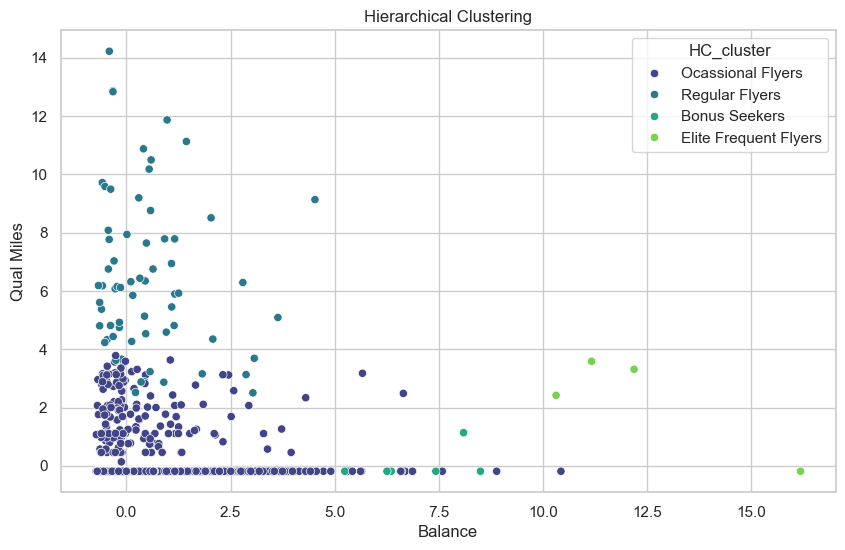

In [272]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled['Balance'], y=df_scaled['Qual_miles'], hue=df['HC_cluster'], palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Balance')
plt.ylabel('Qual Miles')
plt.show()

#### Insights from Hierarchical Clustering
- The Hierarchical clustering algorithm identified 4 clusters in the data.
- The clusters show similar groupings to those identified by K-Means.

### DBSCAN Clustering

#### Ploting K-dist Plot

In [273]:
neigh = NearestNeighbors(n_neighbors = 5).fit(df_scaled)
dist, ind = neigh.kneighbors(df_scaled)

In [274]:
pd.DataFrame(dist)

0         1         2         3         4
0     0.0  0.006285  0.010680  0.011979  0.015996
1     0.0  0.001600  0.010906  0.021891  0.024717
2     0.0  0.024759  0.026467  0.039225  0.060256
3     0.0  0.000069  0.002798  0.007879  0.008866
4     0.0  0.143247  0.208715  0.321869  0.349012
...   ...       ...       ...       ...       ...
3993  0.0  0.103800  0.104800  0.106495  0.109487
3994  0.0  0.037519  0.066845  0.067523  0.081339
3995  0.0  0.131493  0.135676  0.154033  0.199810
3996  0.0  0.019192  0.019311  0.022604  0.024402
3997  0.0  0.000327  0.000486  0.000655  0.001121

[3998 rows x 5 columns]

#### Sorting and Ploting K-dist Plot

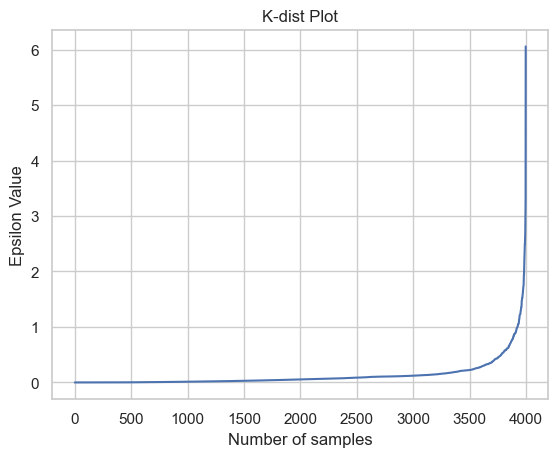

In [276]:
distance = np.sort(dist[:,1], axis = 0)

plt.plot(distance)
plt.xlabel('Number of samples')
plt.ylabel('Epsilon Value')
plt.title('K-dist Plot')
plt.show()

#### Preparing for DBScan clustering

In [303]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering to the dataset
dbscan = DBSCAN(eps=0.9, min_samples=4)
y_db = dbscan.fit_predict(df_scaled)
df['DBSCAN_Cluster'] = y_db
df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1               0.00              0.0               7000       0   
1            2               0.00              0.0               6968       0   
2            4               0.00              0.0               7034       0   
3            1               0.00              0.0               6952       0   
4           26             783.75              2.5               6935       1   

          Km_cluster         HC_cluster  DBSCAN_Cluster  
0  Infrequent Flyers  Ocassional Flyers               0  
1  Infrequent Flyers  Ocassional Flyers               0  
2  Infrequent Flyers  Ocassional Flyers               0  
3  Infrequent Flyers  Ocassional Flyers               0  
4    Moderate Flyers  Ocassional Flyers               0

#### Drawing Inferance From Dataset

In [304]:
df.select_dtypes(include='number').groupby('DBSCAN_Cluster').agg('mean')

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBSCAN_Cluster                                                                
-1              326268.000000  2491.587786   3.229008   1.022901   1.053435   
 0               64646.976949    64.728309   2.015799   1.014245   1.010878   
 1              331270.500000     0.000000   4.833333   1.000000   1.000000   

                  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
DBSCAN_Cluster                                                  
-1               58347.015267    24.068702         513.522901   
 0               15560.630148    11.154105         167.023569   
 1              139864.666667    29.500000         575.208333   

                Flight_trans_12  Days_since_enroll    Award?  
DBSCAN_Cluster                                                
-1                     1.698473        5077.076336  0.809160  
 0                     0.552318        4084.278166  0.354571  
 1                     1.750000        5671.166667  1.000000

The DBSCAN clustering output categorizes the data into three distinct clusters:

1. **Cluster -1 (Noise)**:
   - **Profile**: This cluster contains outliers or 'noise' in the dataset, indicated by the cluster label `-1`. Members of this group have high balances, higher than average qualification miles, and significantly more bonus miles and transactions than the other clusters.
   - **Key Indicators**: Average balance of ~326,268, about 2,492 qualification miles, and 58,347 bonus miles.

2. **Cluster 0 (General Members)**:
   - **Profile**: This represents the general member base with moderate balances and bonus miles, low flight activity, and lower days since enrollment. These members are less active in terms of earning or redeeming miles compared to other clusters.
   - **Key Indicators**: Average balance of ~64,647, around 15560 bonus miles, and relatively fewer days since enrollment (4084).

3. **Cluster 1 (Elite Members)**:
   - **Profile**: This group includes elite members with the highest level of engagement. They have no qualification miles but extremely high bonus miles, suggesting that their activities are heavily tied to promotions or partnerships rather than flying.
   - **Key Indicators**: Extremely high average balance of ~331,270 and bonus miles around 139,865.

#### Labeling the value

In [305]:
df['DBSCAN_Cluster'].replace(to_replace = 0, value = 'General Members', inplace = True)
df['DBSCAN_Cluster'].replace(to_replace = 1, value = 'Elite Members', inplace = True)
df['DBSCAN_Cluster'].replace(to_replace = -1, value = 'Noise', inplace = True)

#### Visualizing DBSCAN clusters using scatter plot

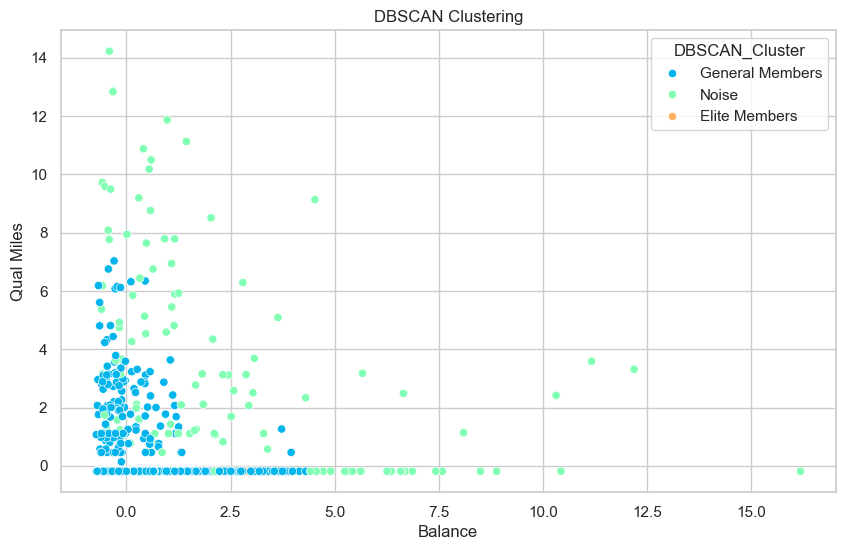

In [306]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled['Balance'], y=df_scaled['Qual_miles'], hue=df['DBSCAN_Cluster'], palette='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Balance')
plt.ylabel('Qual Miles')
plt.show()

### Insights from DBSCAN Clustering
- The DBSCAN algorithm identified several clusters and noise points in the data.
- The clusters are less distinct compared to K-Means and Hierarchical clustering.

### Experimenting with Different Epsilon and MinPts Values

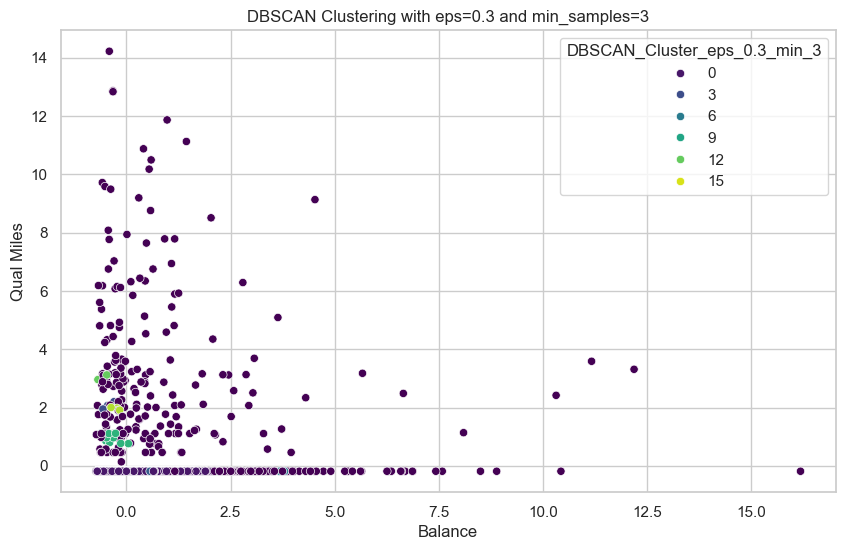

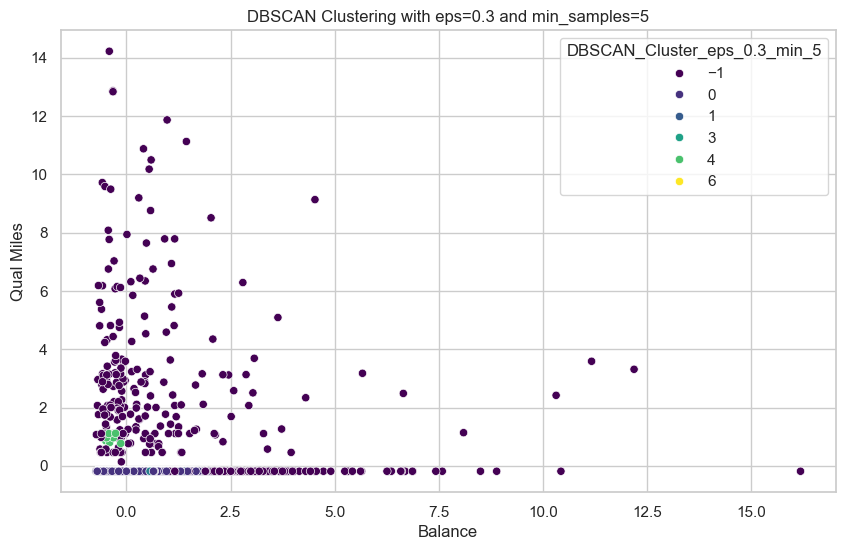

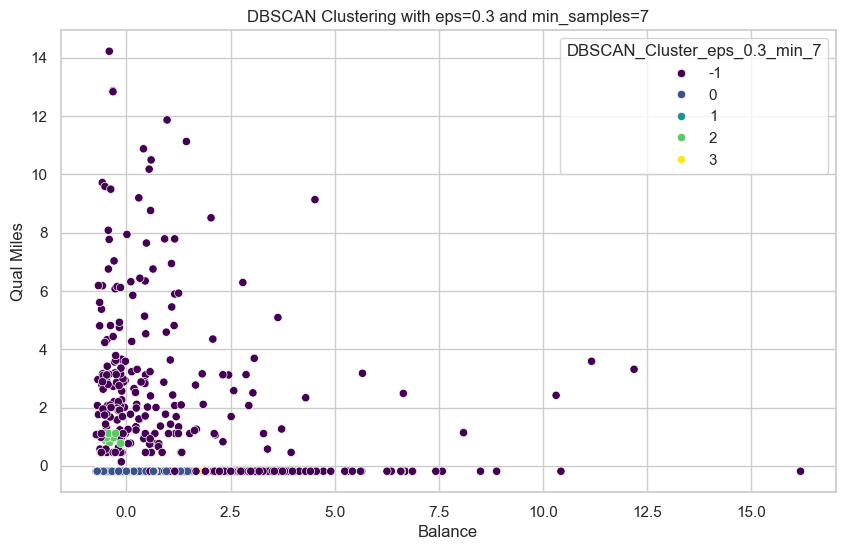

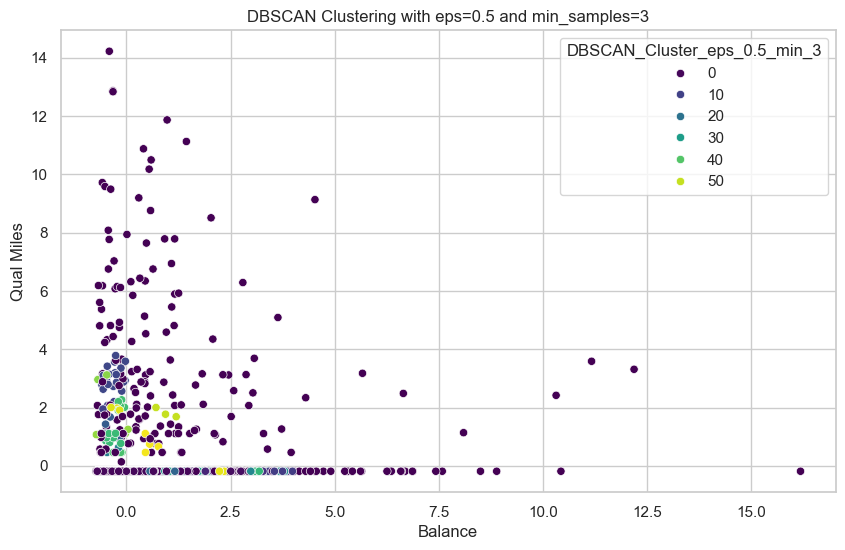

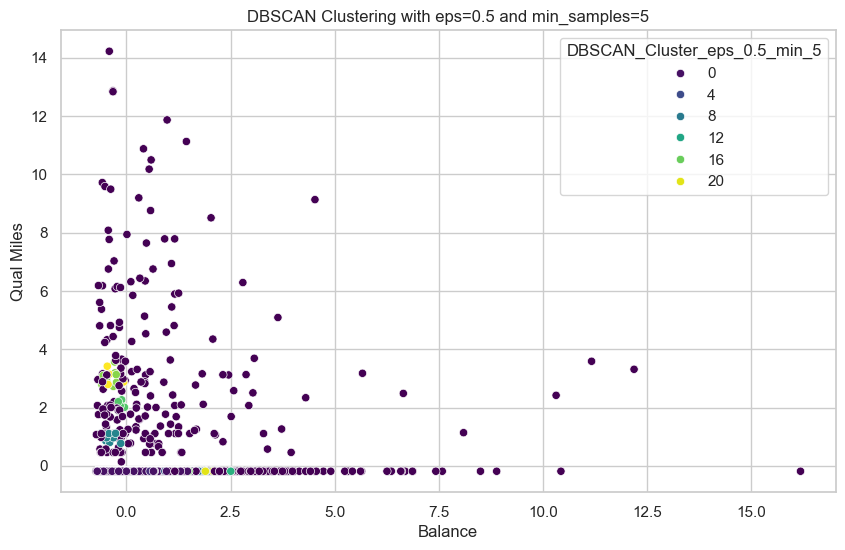

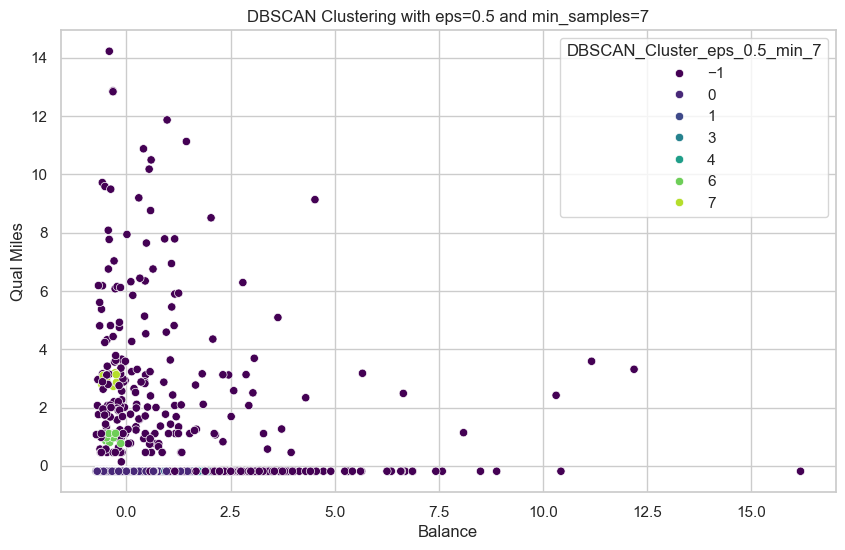

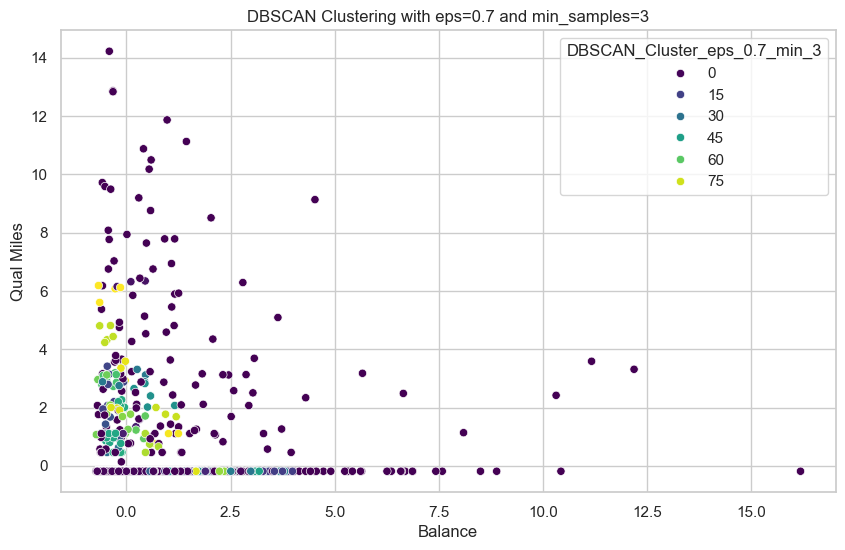

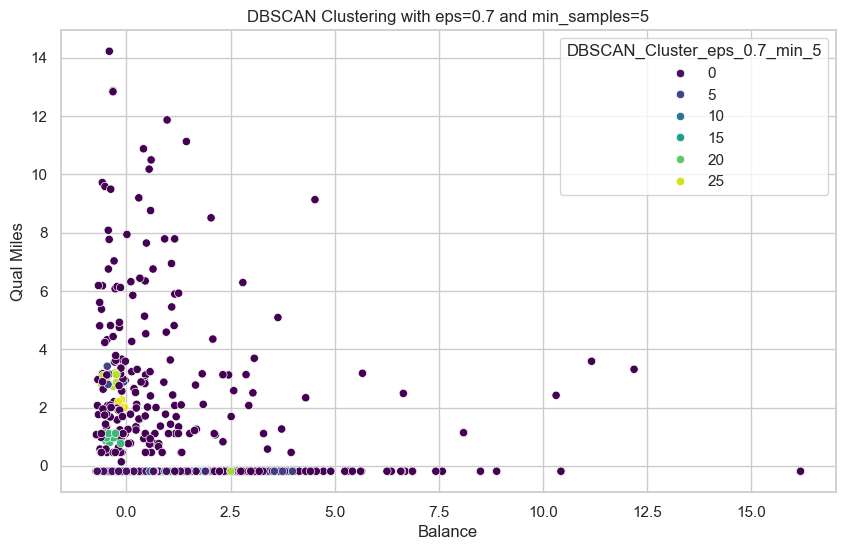

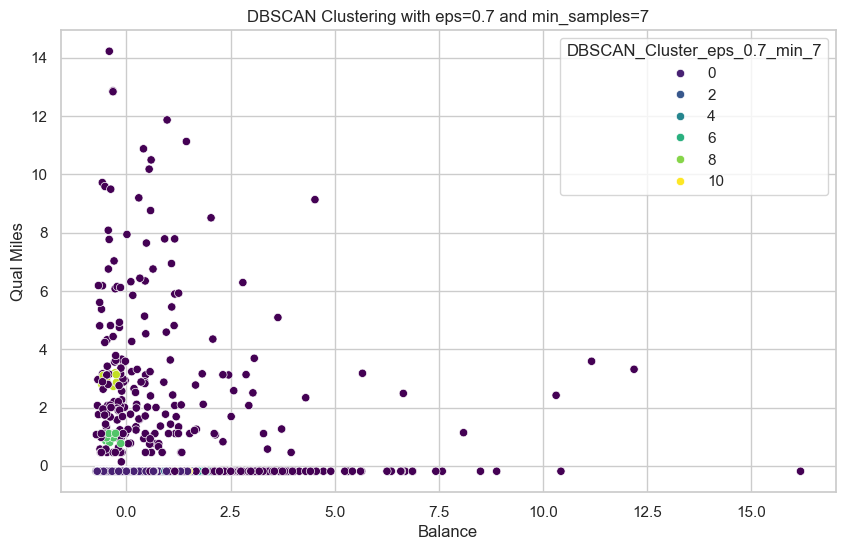

In [307]:
# Experiment with different epsilon and minPts values
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 7]
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df_scaled[f'DBSCAN_Cluster_eps_{eps}_min_{min_samples}'] = dbscan.fit_predict(df_scaled)
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df_scaled['Balance'], y=df_scaled['Qual_miles'], hue=df_scaled[f'DBSCAN_Cluster_eps_{eps}_min_{min_samples}'], palette='viridis')
        plt.title(f'DBSCAN Clustering with eps={eps} and min_samples={min_samples}')
        plt.xlabel('Balance')
        plt.ylabel('Qual Miles')
        plt.show()

## Evaluation and Performance Metrics

Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

In [308]:
df_scaled = df_scaled[['Balance','Qual_miles','Bonus_miles','Bonus_trans']]
df_scaled.head()

Balance  Qual_miles  Bonus_miles  Bonus_trans
0 -0.451294   -0.186323    -0.702920    -1.104430
1 -0.539605   -0.186323    -0.701223    -1.000286
2 -0.320192   -0.186323    -0.539397    -0.791997
3 -0.583944   -0.186323    -0.689421    -1.104430
4  0.239483   -0.186323     1.082876     1.499179

In [309]:
df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1               0.00              0.0               7000       0   
1            2               0.00              0.0               6968       0   
2            4               0.00              0.0               7034       0   
3            1               0.00              0.0               6952       0   
4           26             783.75              2.5               6935       1   

          Km_cluster         HC_cluster   DBSCAN_Cluster  
0  Infrequent Flyers  Ocassional Flyers  General Members  
1  Infrequent Flyers  Ocassional Flyers  General Members  
2  Infrequent Flyers  Ocassional Flyers  General Members  
3  Infrequent Flyers  Ocassional Flyers  General Members  
4    Moderate Flyers  Ocassional Flyers  General Members

In [312]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for K-Means
kmeans_silhouette = silhouette_score(df_scaled,y_km)

# Calculate silhouette score for DBSCAN
dbscan_silhouette = silhouette_score(df_scaled, y_db)

print('kmeans silhouette score =',kmeans_silhouette)
print('DBscan silhouette score =',dbscan_silhouette)

kmeans silhouette score = 0.3947534615065604
DBscan silhouette score = 0.6554548181870521


#### Silhouette Scores
The silhouette scores you've calculated for KMeans and DBSCAN provide valuable insight into the clustering quality:

- **KMeans Silhouette Score: 0.39**  
   A silhouette score of 0.39 suggests that the clustering structure is present but not very strong. The clusters overlap somewhat, and some data points may be closer to other clusters than their assigned one.

- **DBSCAN Silhouette Score: 0.66**  
   A score of 0.66 indicates a much better-defined clustering structure with DBSCAN. This means that the data points are much better separated, with clearer and denser clusters compared to KMeans.

## Conclusion

- The K-Means and Hierarchical clustering algorithms identified similar clusters in the data, with distinct groupings based on `Balance` and `Bonus_miles`.
- **DBSCAN** appears to perform significantly better than **KMeans** for your dataset based on the silhouette scores. This is expected if your data has noise or non-spherical clusters (since DBSCAN is well-suited to handling irregular clusters and noise).
- The higher score for DBSCAN suggests that the algorithm captures the true structure of your data more effectively than KMeans, which relies on spherical clusters.

####  **Author Information:**
- **Author:-**  Er.Pradeep Kumar
- **LinkedIn:-**  [https://www.linkedin.com/in/pradeep-kumar-1722b6123/](https://www.linkedin.com/in/pradeep-kumar-1722b6123/)

#### **Disclaimer:**
This Jupyter Notebook and its contents are shared for educational purposes. The author, Pradeep Kumar, retains ownership and rights to the original content. Any modifications or adaptations should be made with proper attribution and permission from the author.